## PrairieLearn HW problem

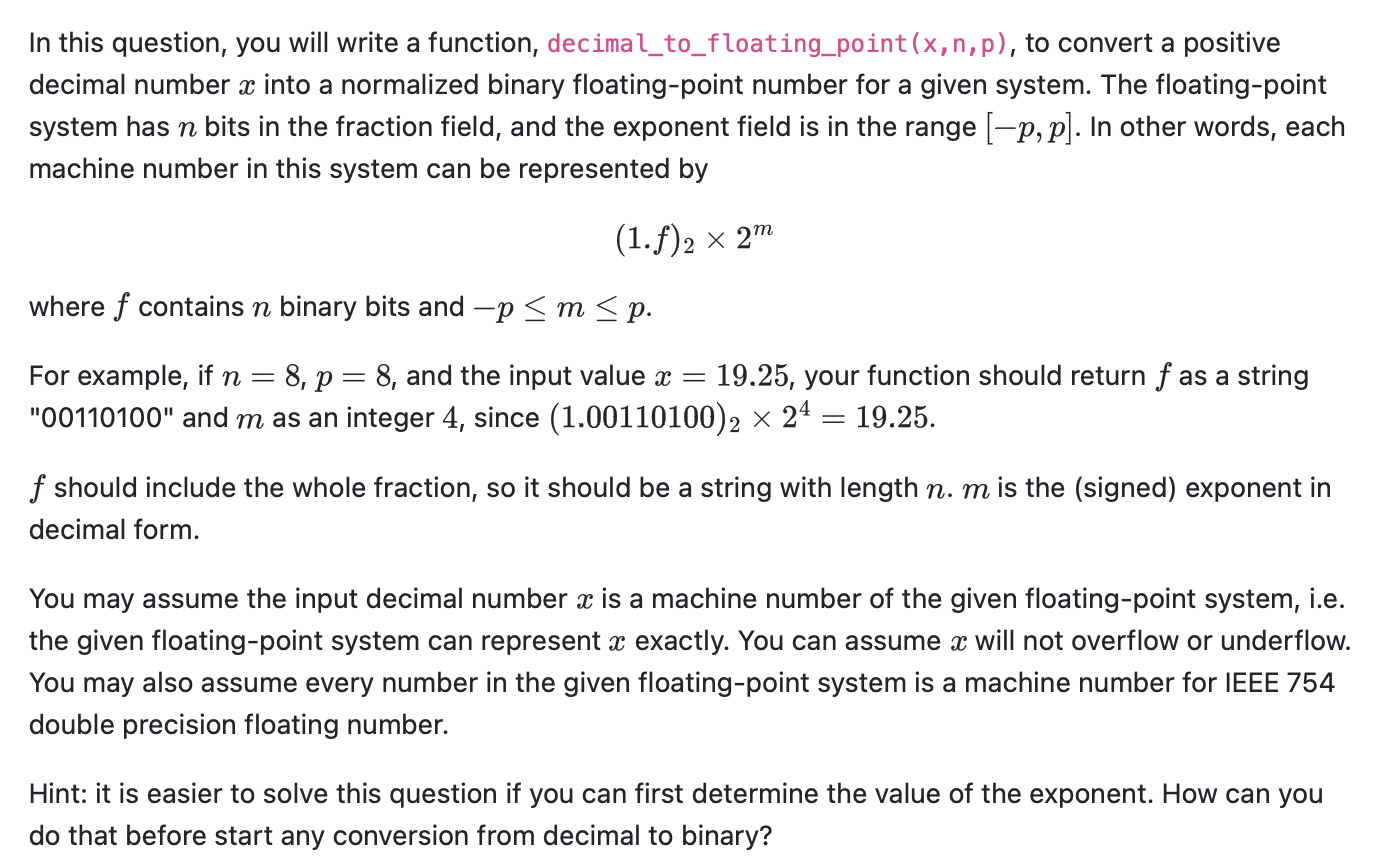

In [ ]:
import math

## Simple Solution

We will first obtain the value of the exponent, and then we will get the fractional part of the significand.

We know that:

$1 \le \frac{x}{2^m} = (1.f)_2 < 2 $

$\frac{1}{2} < \frac{2^m}{x} \le 1 $

$\frac{x}{2} < 2^m \le x $

$\log_2(\frac{x}{2}) < m \le \log_2(x) $

Compute the boundaries for the example above, and then determine the value of $m$:

In [ ]:
x = 19.25
n = 8
p = 8

# Write the boundaries and determine m

#clear
print("bounds for m = ", math.log(x/2,2),math.log(x,2) )

m = math.floor(math.log(x,2))
print("m = ", m)


We now need to compute the fractional part of the significand. We know that:

$ (1.f)_2 = \frac{x}{2^m}  $

Compute the value of $f$ as a decimal number:


In [ ]:
#clear
fdec = x/2**m - 1
print("f in decimal = ", fdec)

Convert $f$ to a binary number with $n$ bits. Recall that $f$ is now a number < 1.

In [ ]:
#clear
f = ''
temp = fdec
for i in range(n):
    temp = temp*2
    temp_int = int(temp)
    temp = temp - temp_int
    f += str(temp_int)
f    

You are ready to define the function `decimal_to_floating_point`

In [ ]:
def decimal_to_floating_point(x, n, p):
    f = ...
    m = ...
    #clear
    
    m = math.floor(math.log(x,2))
    temp = x/2**m - 1
    f = ''
    for i in range(n):
        temp = temp*2
        temp_int = int(temp)
        temp = temp - temp_int
        f += str(temp_int)    
    
    #clear
    return f,m

In [ ]:
decimal_to_floating_point(0.004245, n, p)

## Not as simple...

Some students use the approach of splitting the decimal and integer parts. In this case, we need to make sure we are considering cases of positive and negative exponents, and also that we have the correct padding of zeros when the binary representation is less than $n$. Let's take a look at another possible solution (this was inpired by other student's solutions during class)

#### Integer part

if the number $x$ is greater than 1, we can compute the binary representation for the integer part:

In [ ]:
x = 0.00424 #19.25
n = 8
p = 8

a = int(x)
print('integer part is = ', a)

# we will solve this problem using lists 
# to store the binary numbers at first
binary_integer = []

for i in range(100):
    rem = a % 2
    a = int(a/2)
    binary_integer.append(rem)
    if a == 0:
        break  
        
# recall that we need to invert the binary list
binary_integer = binary_integer[::-1]
print('binary for integer number is = ', binary_integer)


Since we want a normalized floating point number, we can get the exponent by checking how many times we need to shift the binary point from the integer number.

In [ ]:
m = len(binary_integer) - 1
print("m = ", m)

Notice that this is not going to work for small numbers. Change $x$ above to $0.0625$ and see what happens. If you use this method, you need to make sure the computation above is only performed when $x>1$. We will use that when we are puttig all the code together.

#### Fractional part

Once we remove the integer part computed above, we can compute the binary representation for the fractional part. This will also be performed in the cases for numbers smaller than one (without an integer part).

In [ ]:
fdec = x - int(x)
print('fractional part is = ', fdec)

In [ ]:
binary_fractional = []

temp = fdec
for i in range(100):
    temp = temp*2
    temp_int = int(temp)
    temp = temp - temp_int
    binary_fractional.append(temp_int)
    if temp == 0:
        break

#### Combining both parts

We need to now put these things together into the function, and make sure we check for edge cases:

In [ ]:
def decimal_to_floating_point(x, n, p):


    a = int(x)
    binary_integer = []

    if x > 1:

        # we will solve this problem using lists 
        # to store the binary numbers at first

        for i in range(100):
            rem = a % 2
            a = int(a/2)
            binary_integer.append(rem)
            if a == 0:
                break  

        # recall that we need to invert the binary list
        binary_integer = binary_integer[::-1]
        m = len(binary_integer) - 1


    fdec = x - int(x)
    binary_fractional = []

    #clear
    temp = fdec
    for i in range(50):
        temp = temp*2
        temp_int = int(temp)
        temp = temp - temp_int
        binary_fractional.append(temp_int)

    if x <= 1:
        for i,b in enumerate(binary_fractional):
            if b == 1:
                break
        m = -(i+1)
        binary_fractional = binary_fractional[i:]

    print("m = ", m)        
    binary_number = binary_integer + binary_fractional

    f = ''.join(map(str,binary_number[1:1+n]))
    print("f = ", f)


    return f,m

In [ ]:
decimal_to_floating_point(0.0625, n, p)